In [1]:
import yt

yt : [INFO     ] 2021-03-18 15:31:44,221 Changing family DM from 1 to 0


In [4]:
import numpy as np

In [5]:
@yt.particle_filter(requires=["particle_tag"], filtered_type='all')
def matter(pfilter, data):
    filter = data[(pfilter.filtered_type, "particle_tag")] == 0
    return filter
@yt.particle_filter(requires=["particle_tag"], filtered_type='all')
def antimatter(pfilter, data):
    filter = data[(pfilter.filtered_type, "particle_tag")] == 1
    return filter
@yt.particle_filter(requires=["particle_family"], filtered_type='all')
def total(pfilter, data):
    filter = data[(pfilter.filtered_type, "particle_family")] == 1
    return filter

In [14]:
    ds = yt.load('output_00188/info_00188.txt')
    ds.add_particle_filter('matter')
    ds.add_particle_filter('antimatter')
    ds.add_particle_filter('total')

yt : [INFO     ] 2021-03-18 17:59:31,254 Parameters: current_time              = 0.9226510089129429
yt : [INFO     ] 2021-03-18 17:59:31,255 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-03-18 17:59:31,256 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-03-18 17:59:31,257 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-03-18 17:59:31,258 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-03-18 17:59:31,259 Parameters: current_redshift          = 0.9227799842598046
yt : [INFO     ] 2021-03-18 17:59:31,260 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2021-03-18 17:59:31,260 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2021-03-18 17:59:31,261 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-03-18 17:59:31,262 Parameters: hubble_constant           = 0.7
yt : [WARNING  ] 2021-03-18 17:59:31,264 Detected 1 extra gravity fields.
yt : [WARNING  ] 2021-03

False

In [50]:
#for n in range(2,4):
#    if(n<10):
#        filename='output_0000'+str(n)+'/info_0000'+str(n)+'.txt'
#    else:
#        filename='output_000'+str(n)+'/info_000'+str(n)+'.txt'
#    ds = yt.load(filename)
#    ds.add_particle_filter('matter')
#    ds.add_particle_filter('antimatter')
#    ds.add_particle_filter('total')
#    slcm = yt.SlicePlot(ds, 'z', ('deposit', 'matter_mass'), width=(100/(1+ds.current_redshift),'kpc'))
#    slcm.set_unit(('deposit', 'matter_mass'), 'Msun')
#    slcm.set_zlim(('deposit', 'matter_mass'), 1e-1, 1e2)
#slcm.show()
#    slcm.save(name='matter@z='+str(ds.current_redshift))
#    slca = yt.SlicePlot(ds, 'z', ('deposit', 'antimatter_mass'), width=(100/(1+ds.current_redshift),'kpc'))
#    slca.set_unit(('deposit', 'antimatter_mass'), 'Msun')
  #  slca.annotate_streamlines(('deposit', 'antimatter_cic_velocity_x'), ('deposit', 'antimatter_cic_velocity_y'))
#    slca.set_zlim(('deposit', 'antimatter_mass'), 1e-1, 1e2)
#    slca.save(name='antimatter@z='+str(ds.current_redshift))

    

In [5]:
ds.domain_width.in_units("Mpc").value[0]
#ds.domain_width.in_units("kpc").value[0]

0.0021550254870167564

In [5]:
sp = ds.sphere([0.5,0.5,0.5], (200, "Mpc"))
particle_mass = sp.quantities.total_quantity("particle_mass")
print(particle_mass.in_units('1e12*Msun'))

0.06613829901865814 1000000000000*Msun


In [6]:

ad = ds.all_data()

mass=ad['particle_mass']
tag=ad['particle_tag']


In [63]:
ds.field_list

[('all', 'particle_family'),
 ('all', 'particle_identity'),
 ('all', 'particle_level'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_tag'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('gravity', 'potential'),
 ('gravity', 'x-acceleration'),
 ('gravity', 'y-acceleration'),
 ('gravity', 'z-acceleration'),
 ('io', 'particle_family'),
 ('io', 'particle_identity'),
 ('io', 'particle_level'),
 ('io', 'particle_mass'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_tag'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z')]


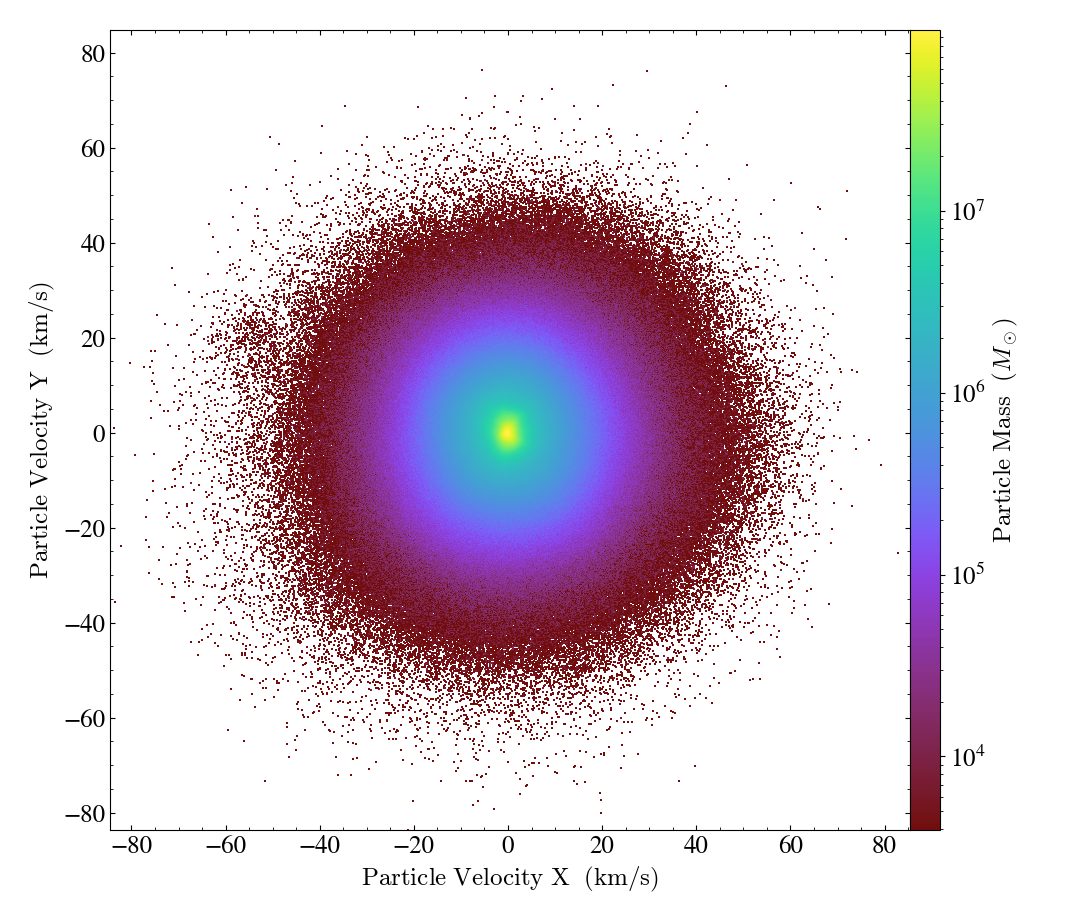

In [5]:

p = yt.ParticlePlot(ds, 'particle_velocity_x', 'particle_velocity_y','particle_mass')
p.set_unit('particle_velocity_x', 'km/s')
p.set_unit('particle_velocity_y', 'km/s')
p.set_unit('particle_mass', 'Msun')
p.show()

In [5]:
ds.current_time

-13.6385284767374 code_time

In [3]:
q = yt.ParticlePlot(ds, 'particle_position_x', 'particle_position_y','particle_mass')
q.set_unit('particle_mass', 'Msun')
#p.zoom(32)
#q.annotate_timestamp(corner='upper_left', time=True, redshift=False, draw_inset_box=True,time_format='t = {time:.1f}', time_unit='code_time')
q.annotate_scale()
#q.show()
q.save()

yt : [INFO     ] 2021-02-01 15:34:51,011 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-02-01 15:34:51,012 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-02-01 15:34:51,013 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-02-01 15:34:51,014 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-02-01 15:34:51,021 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh
yt : [INFO     ] 2021-02-01 15:35:03,212 Saving plot info_00063_Particle_z_particle_mass.png
/home/stahl/.local/lib/python3.6/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


['info_00063_Particle_z_particle_mass.png']

yt : [INFO     ] 2021-03-18 11:19:53,408 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-18 11:19:53,409 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-18 11:19:53,410 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-18 11:19:53,410 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-18 11:19:53,419 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh
/home/stahl/.local/lib/python3.6/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0



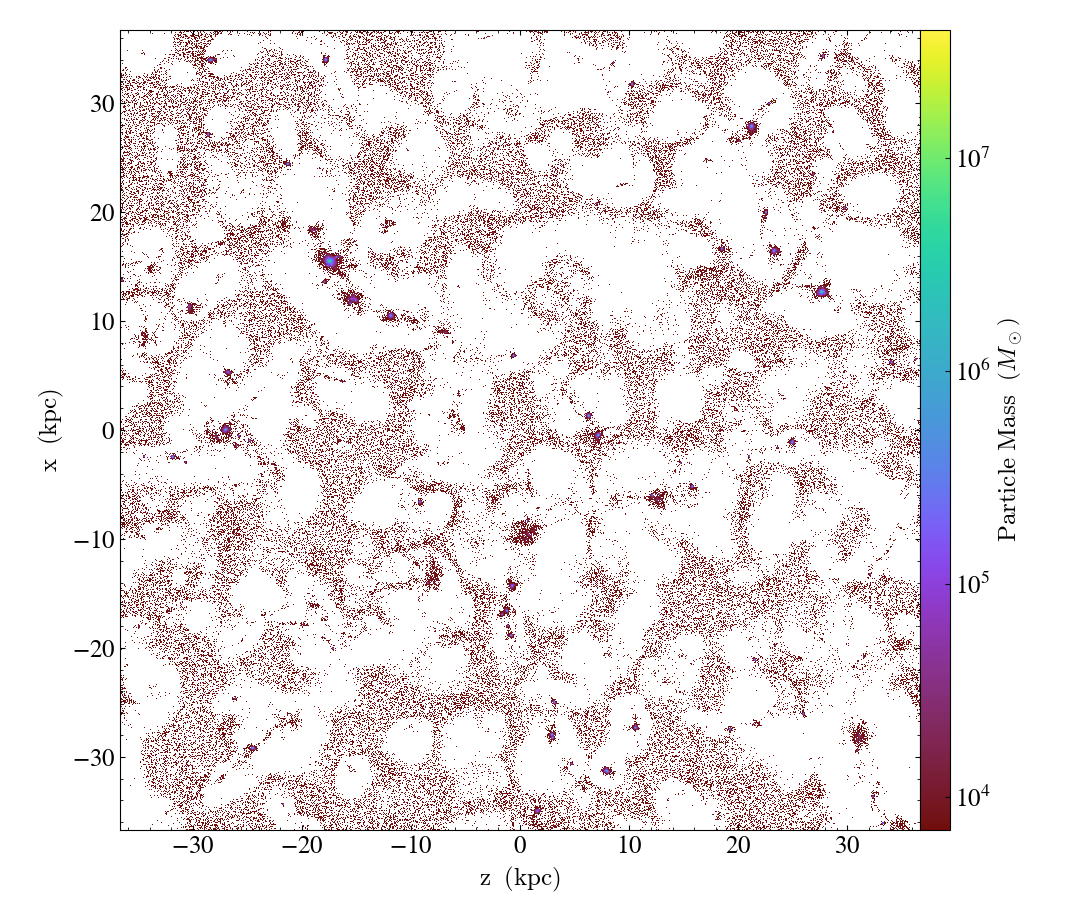

In [7]:
q = yt.ParticlePlot(ds, 'particle_position_x', 'particle_position_z','particle_mass', depth=0.01, center=[0.5, 0.5, 0.5])
q.set_unit('particle_mass', 'Msun')
#q.zoom(4)
#q.set_width((0.1, 'Mpccm'))
q.set_zlim('particle_mass', 7e3, 4e7, dynamic_range=None)
q.set_cmap('particle_mass', 'arbre')
q.show()
#q.save()



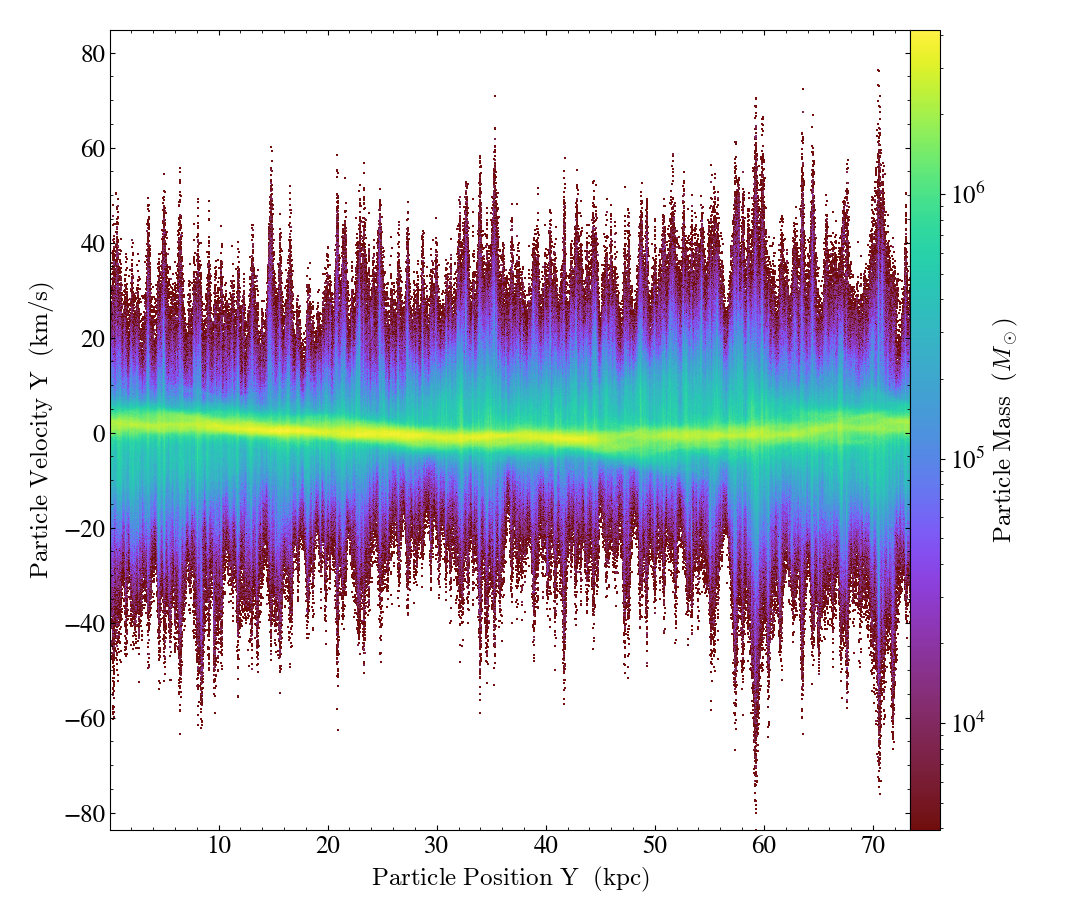

In [8]:
p = yt.ParticlePlot(ds, 'particle_position_y', 'particle_velocity_y','particle_mass')
p.set_unit('particle_velocity_y', 'km/s')
p.set_unit('particle_position_y', 'kpc')
p.set_unit('particle_mass', 'Msun')
p.show()



In [10]:

print (ds.domain_width.in_units("kpc"))

[51.14312096 51.14312096 51.14312096] kpc


In [349]:
print (ds.domain_width.in_units("kpc")*(1+ds.current_redshift))

[4285.71417592 4285.71417592 4285.71417592] kpc


yt : [INFO     ] 2021-02-01 10:26:31,770 xlim = 0.152773 0.847227
yt : [INFO     ] 2021-02-01 10:26:31,771 ylim = 0.152773 0.847227
yt : [INFO     ] 2021-02-01 10:26:31,772 xlim = 0.152773 0.847227
yt : [INFO     ] 2021-02-01 10:26:31,772 ylim = 0.152773 0.847227
yt : [INFO     ] 2021-02-01 10:26:31,774 Making a fixed resolution buffer of (('deposit', 'antimatter_mass')) 800 by 800



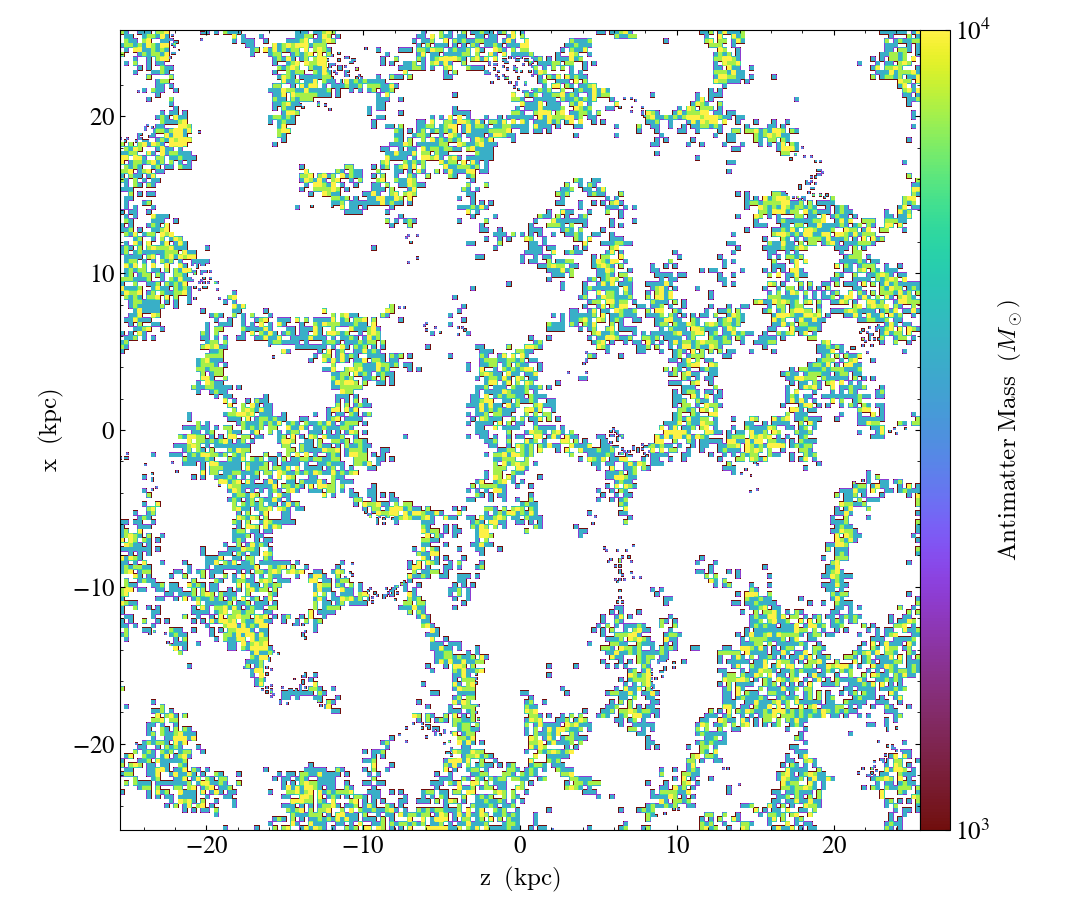

In [9]:
slca = yt.SlicePlot(ds, 'y', ('deposit', 'antimatter_mass'), width=(51,'kpc'),center=[0.5, 0.5, 0.5])
slca.set_unit(('deposit', 'antimatter_mass'), 'Msun')
#slca.annotate_streamlines(('deposit', 'antimatter_cic_velocity_x'), ('deposit', 'antimatter_cic_velocity_y'))
slca.set_zlim(('deposit', 'antimatter_mass'), 1e3, 1e4)
#slca.set_cmap('antimatter_mass', 'Oranges')
slca.show()
#slca.save()



In [19]:
import cv2
img1 = cv2.imread('info_00063_Slice_y_matter_mass.png')
img2 = cv2.imread('info_00063_Slice_y_antimatter_mass.png')



In [14]:
tot=img1+img2

In [22]:

dst = cv2.addWeighted(img1,0.5,img2,0.5,10)
cv2.imwrite('blen.png', dst)
#cv2.imwrite('superimposed', dst)

True

In [15]:
cv2.imwrite('toto.png', tot)

True

In [2]:
add=cv2.add(img1,img2)
cv2.imshow('add',add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
#for n in range(0,10):
#        slca = yt.SlicePlot(ds, 'x', ('deposit', 'matter_mass'), width=(1,'Mpccm/h'),center=[0.5, 0.5, n/10])
#        slca.set_unit(('deposit', 'matter_mass'), 'Msun')
#slca.annotate_streamlines(('deposit', 'antimatter_cic_velocity_x'), ('deposit', 'antimatter_cic_velocity_y'))
#        slca.set_zlim(('deposit', 'matter_mass'), 1e2, 1e5)
        #slca.show()
#        slca.save(str(n))

yt : [INFO     ] 2021-02-01 10:26:47,137 xlim = 0.152773 0.847227
yt : [INFO     ] 2021-02-01 10:26:47,138 ylim = 0.152773 0.847227
yt : [INFO     ] 2021-02-01 10:26:47,139 xlim = 0.152773 0.847227
yt : [INFO     ] 2021-02-01 10:26:47,142 ylim = 0.152773 0.847227
yt : [INFO     ] 2021-02-01 10:26:47,144 Making a fixed resolution buffer of (('deposit', 'matter_mass')) 800 by 800



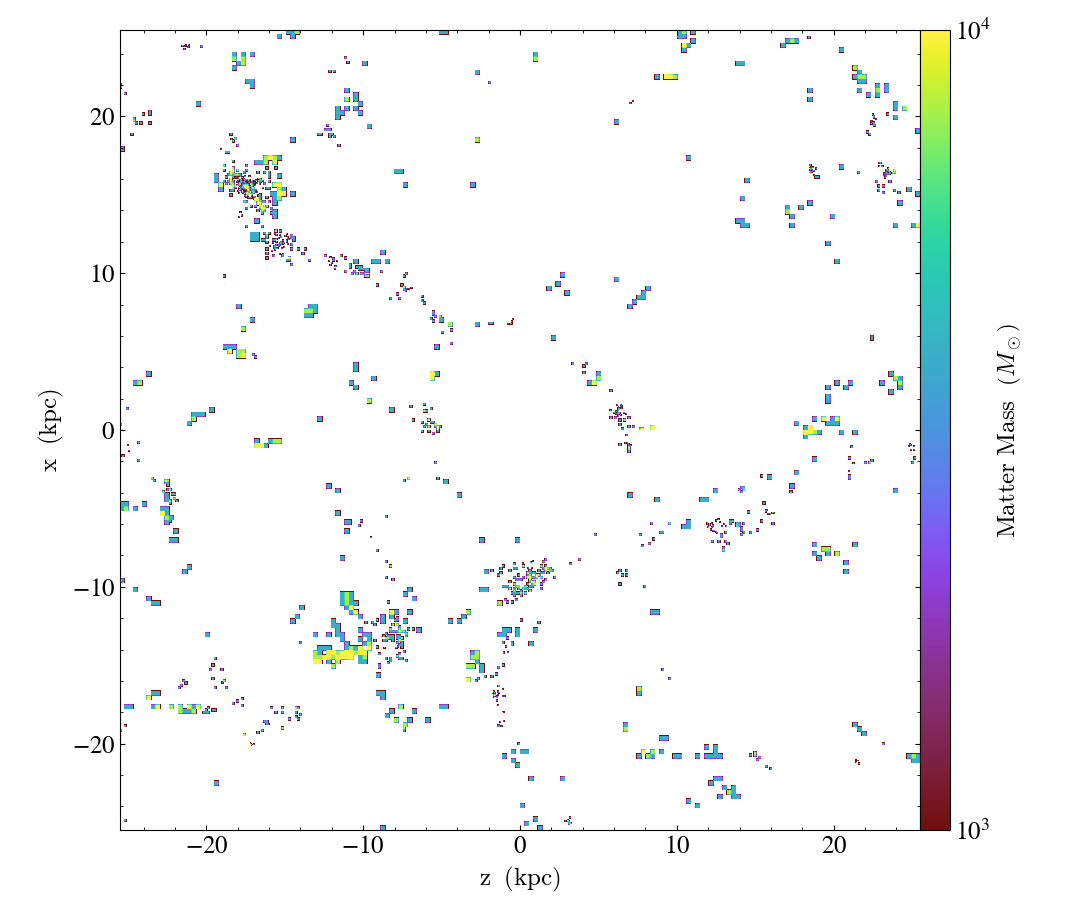

In [10]:
slcm = yt.SlicePlot(ds, 'y', ('deposit', 'matter_mass'), width=(51,'kpc'),center=[0.5, 0.5, 0.5])
slcm.set_unit(('deposit', 'matter_mass'), 'Msun')
#slcm.annotate_streamlines(('deposit', 'matter_cic_velocity_x'), ('deposit', 'matter_cic_velocity_y'))
slcm.set_zlim(('deposit', 'matter_mass'), 1e3, 1e4)
#slcm.set_cmap('matter_mass', 'GREEN')
slcm.show()
#slcm.save()

yt : [INFO     ] 2021-02-01 10:28:07,413 xlim = 0.152773 0.847227
yt : [INFO     ] 2021-02-01 10:28:07,414 ylim = 0.152773 0.847227
yt : [INFO     ] 2021-02-01 10:28:07,415 xlim = 0.152773 0.847227
yt : [INFO     ] 2021-02-01 10:28:07,416 ylim = 0.152773 0.847227
yt : [INFO     ] 2021-02-01 10:28:07,418 Making a fixed resolution buffer of (('deposit', 'total_mass')) 800 by 800



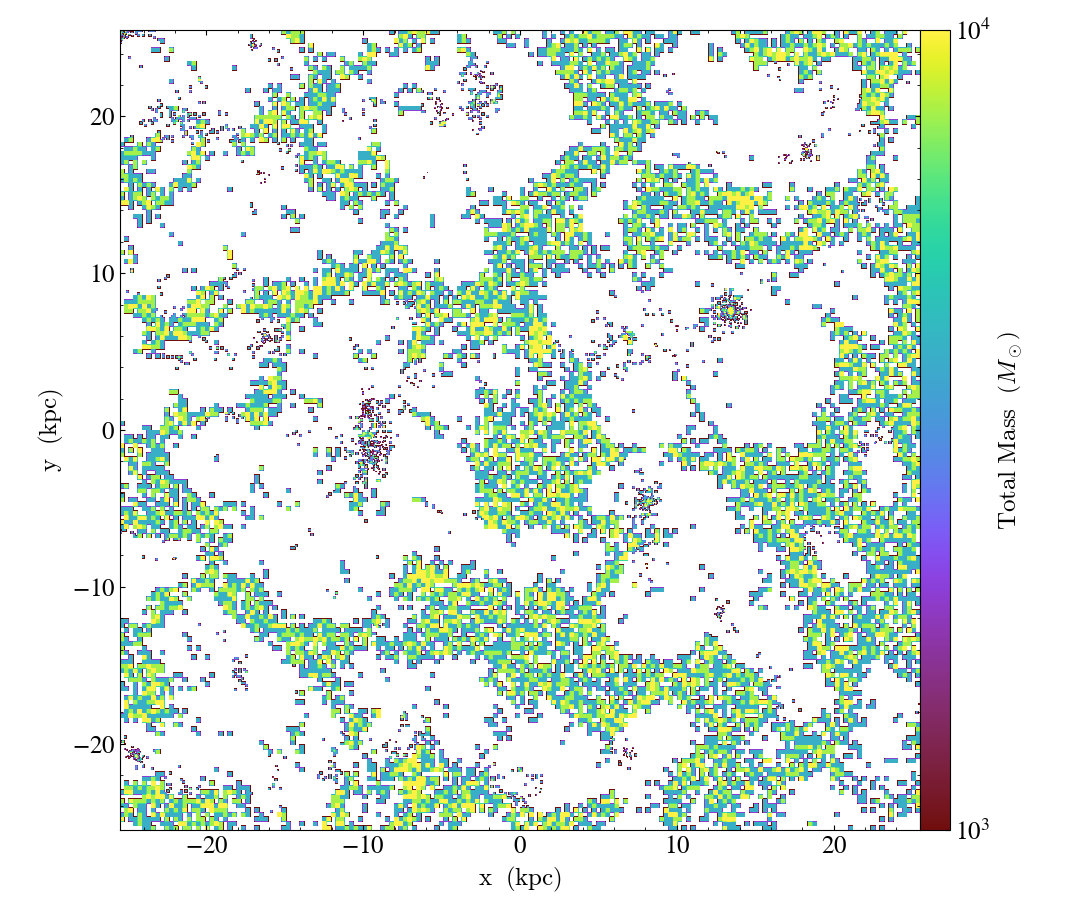

In [12]:
from yt.units import kpc
slcm = yt.SlicePlot(ds, 'z', ('deposit', 'total_mass'), width=(51,'kpc'),center=[0.5, 0.5, 0.5])
slcm.set_unit(('deposit', 'total_mass'), 'Msun')
slcm.set_zlim(('deposit', 'total_mass'), 1e3, 1e4)
#slcm.zoom(2)
slcm.show()
#slcm.save()

yt : [INFO     ] 2020-12-07 21:29:17,279 Projection completed
yt : [INFO     ] 2020-12-07 21:29:17,280 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-12-07 21:29:17,281 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-12-07 21:29:17,282 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-12-07 21:29:17,283 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-12-07 21:29:17,287 Making a fixed resolution buffer of (('deposit', 'matter_density')) 800 by 800
/home/stahl/.local/lib/python3.6/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0



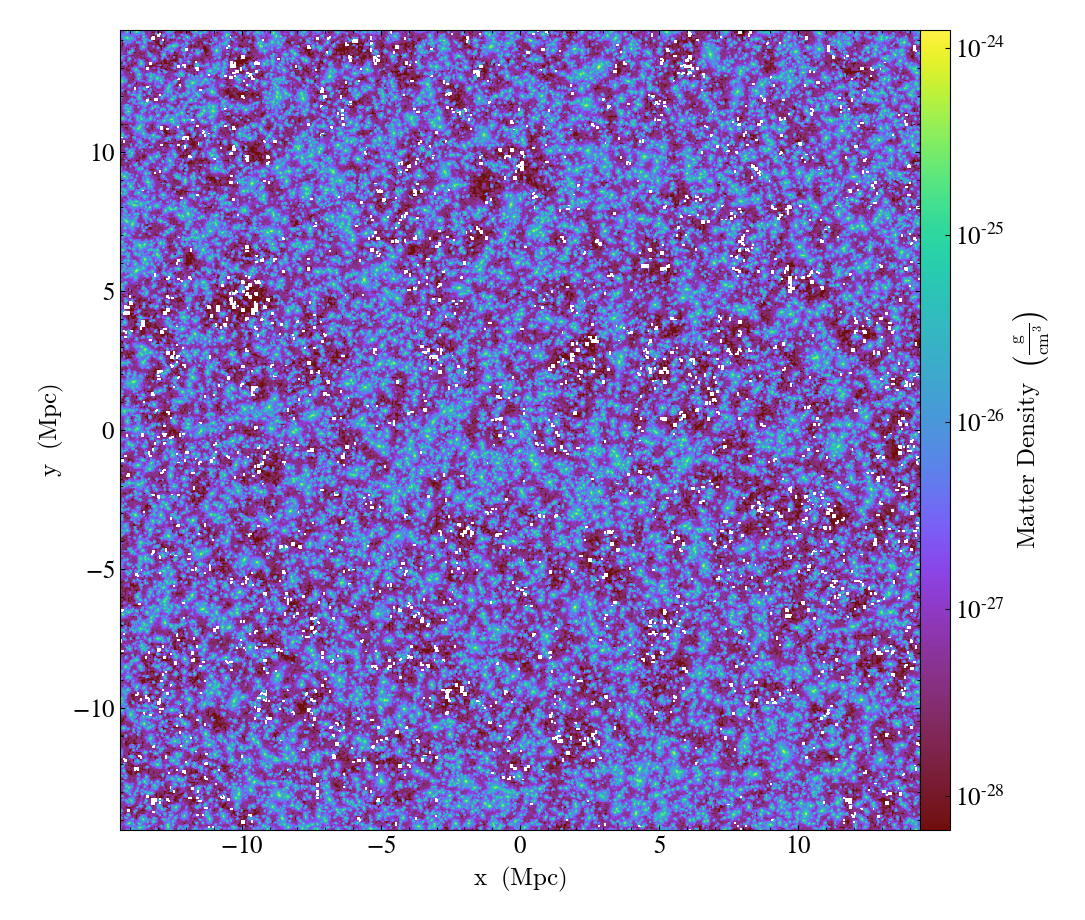

In [12]:
p = yt.ProjectionPlot(ds, 'z', ('deposit', 'matter_density'),weight_field=('deposit', 'matter_density'))
#p.annotate_quiver(('deposit', 'matter_cic_velocity_x'), ('deposit', 'matter_cic_velocity_y'))
p.show()
#p.save()

yt : [INFO     ] 2020-12-07 21:30:32,886 Projection completed
yt : [INFO     ] 2020-12-07 21:30:32,887 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-12-07 21:30:32,888 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-12-07 21:30:32,892 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-12-07 21:30:32,892 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-12-07 21:30:32,895 Making a fixed resolution buffer of (('deposit', 'antimatter_density')) 800 by 800



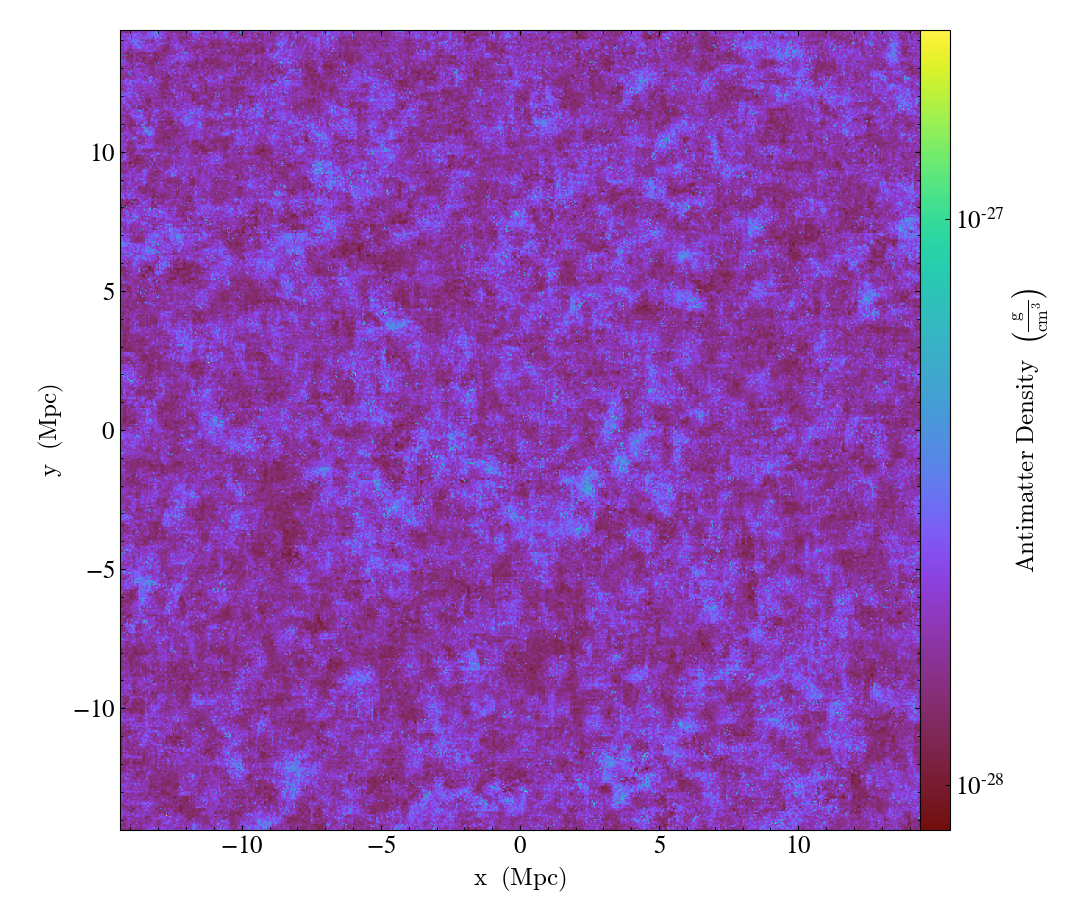

In [13]:
q = yt.ProjectionPlot(ds, 'z', ('deposit', 'antimatter_density'), weight_field=('deposit', 'antimatter_density'))
#q.annotate_quiver(('deposit', 'antimatter_cic_velocity_x'), ('deposit', 'antimatter_cic_velocity_y'))
q.show()
#q.save()

yt : [INFO     ] 2021-03-18 14:04:00,904 Projection completed
yt : [INFO     ] 2021-03-18 14:04:00,935 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-18 14:04:00,937 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-18 14:04:00,941 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-03-18 14:04:00,942 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-03-18 14:04:00,954 Making a fixed resolution buffer of (('deposit', 'total_density')) 800 by 800



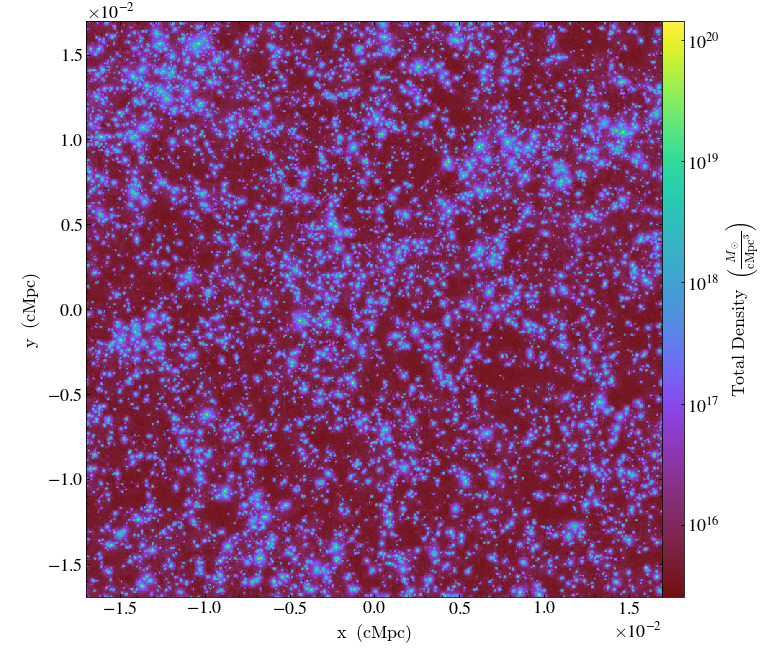

In [17]:
r = yt.ProjectionPlot(ds, 'z', ('deposit', 'total_density'),weight_field=('deposit', 'total_density'))
#r.annotate_halos(hc)
r.set_axes_unit('cMpc')
r.set_unit(('deposit', 'total_density'), 'Msun/cMpc**3')
r.show()
#r.save()

In [15]:
ds.domain_width.in_units('Mpc')
a=0.462
h=0.63
ds.domain_width.in_units('Mpc')/h
ds.domain_width.in_units('Mpc')/h

YTArray([45.63969959, 45.63969959, 45.63969959]) Mpc

In [128]:
BoxSize

array(0.11656999)

In [12]:
#mesure du spectre de puissance
import yt
import numpy as np
import density_field_library as DFL
import Pk_library as PKL
import matplotlib.pyplot as plt
from scipy import interpolate
import MAS_library as MASL

ds = yt.load('output_00063/info_00063.txt', cosmological=False)

grid              = 256    #grid size
pBoxSize           = ds.domain_width.in_units('Mpc/h') #Mpc/h
BoxSize            =pBoxSize[0].value #Mpc/h
#seed              = 1      #value of the initial random seed
Rayleigh_sampling = 1     #whether sampling the Rayleigh distribution for modes amplitudes
threads           = 1      #number of openmp threads
verbose           = True   #whether to print some information
axis=0
MAS='CIC'





# particle positions in 3D
ad=ds.all_data()
pos = ad['particle_position'].astype(np.float32)*BoxSize
tag = ad['particle_tag'].astype(np.float32)

# define 3D density fields
delta = np.zeros((grid,grid,grid), dtype=np.float32)
rhom = np.zeros((grid,grid,grid), dtype=np.float32)
rhoam = np.zeros((grid,grid,grid), dtype=np.float32)

# number of particles
Np = 256**3
posm=np.zeros((np.abs(int(np.sum(tag-1).value)),3))
posam=np.zeros((int(np.sum(tag).value),3))
countm=0
countam=0
for i in range(0,Np):
    if(tag[i]==0):
        posm[countm]=pos[i]
        countm=countm+1
    else:
        posam[countam]=pos[i]
        countam=countam+1

# construct 3D density field
MASL.MA(posm.astype(np.float32), rhom, BoxSize, MAS, verbose=verbose)
MASL.MA(posam.astype(np.float32), rhoam, BoxSize, MAS, verbose=verbose)

# at this point, rho contains the effective number of particles in each voxel
# now compute overdensity and density constrast
#delta /= np.mean(delta, dtype=np.float64);  delta -= 1.0
delta=rhom-rhoam


rhom /= np.mean(rhom, dtype=np.float64);  rhom -= 1.0
rhoam /= np.mean(rhoam, dtype=np.float64);  rhoam -= 1.0


yt : [INFO     ] 2021-03-18 16:56:13,392 Parameters: current_time              = -13.6385284767374
yt : [INFO     ] 2021-03-18 16:56:13,393 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-03-18 16:56:13,395 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-03-18 16:56:13,396 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-03-18 16:56:13,397 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2021-03-18 16:56:13,404 Detected 1 extra gravity fields.
yt : [WARNING  ] 2021-03-18 16:56:19,327 This output has no cooling fields
yt : [INFO     ] 2021-03-18 16:56:19,698 Adding particle_type: DM
yt : [INFO     ] 2021-03-18 16:56:19,716 Adding particle_type: star
yt : [INFO     ] 2021-03-18 16:56:19,737 Adding particle_type: cloud
yt : [INFO     ] 2021-03-18 16:56:19,752 Adding particle_type: dust
yt : [INFO     ] 2021-03-18 16:56:19,773 Adding particle_type: star_tracer
yt : [INFO     ] 2021-03-18 16:56:19,803 Add


Using CIC mass assignment scheme
Time taken = 0.336 seconds


Using CIC mass assignment scheme
Time taken = 0.410 seconds




Computing power spectrum of the field...
Time to complete loop = 0.78
Time taken = 1.12 seconds

Computing power spectrum of the field...
Time to complete loop = 0.74
Time taken = 1.03 seconds

Computing power spectrum of the field...
Time to complete loop = 0.73
Time taken = 1.00 seconds


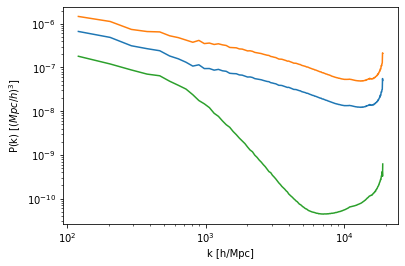

<function matplotlib.pyplot.close(fig=None)>

In [13]:
Pk = PKL.Pk(delta, BoxSize, axis, MAS, threads, verbose)
k       = Pk.k3D
Pk0     = Pk.Pk[:,0]

Pkm = PKL.Pk(rhom, BoxSize, axis, MAS, threads, verbose)
Pk1     = Pkm.Pk[:,0]

Pkam = PKL.Pk(rhoam, BoxSize, axis, MAS, threads, verbose)
Pk2     = Pkam.Pk[:,0]

plt.loglog(k,Pk0) 
plt.loglog(k,Pk1)
plt.loglog(k,Pk2)
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"P(k) $[(Mpc/h)^3]$")
plt.show()
#plt.savefig("namefig")
plt.close  


Computing power spectrum of the field...
Time to complete loop = 0.73
Time taken = 1.34 seconds
-0.9167243546778981
[0.0104356  0.03822057]


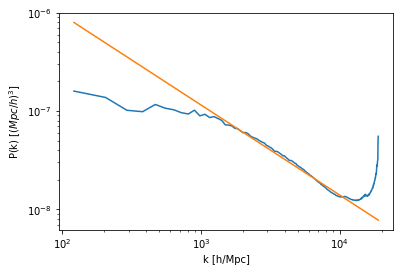

<Figure size 432x288 with 0 Axes>

In [57]:


Pk = PKL.Pk(delta, BoxSize, axis, MAS, threads, verbose)
k       = Pk.k3D
Pk0     = Pk.Pk[:,0]


#code pour fitter la loi de puissance en linéaire


from scipy import optimize

def test_func(x, a, b):
    return b+ x*a

params, params_covariance = optimize.curve_fit(test_func,np.log10(k)[10:110], np.log10(Pk0)[10:110],
                                               p0=[1,1])

print(params[0])
perr = np.sqrt(np.diag(params_covariance))
print(perr)

plt.loglog(k,Pk0) 
plt.loglog(k,10**params[1]*k**params[0])
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"P(k) $[(Mpc/h)^3]$")
plt.show()
plt.savefig("namefig")
##plt.close  

In [76]:
f=np.zeros((120))
f = interpolate.interp1d(kt[240:360], Pkt[240:360])

[-2.86802291  2.29153361]


<function matplotlib.pyplot.close(fig=None)>

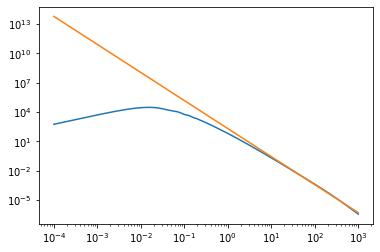

In [61]:
from scipy import optimize

def test_func(x, a, b):
    return b+ x*a

params, params_covariance = optimize.curve_fit(test_func,np.log10(kt)[600:800], np.log10(Pkt)[600:800],
                                               p0=[1,1])
print(params)
 #read power spectrum; 
kt, Pkt = np.loadtxt('my_Pk.dat', unpack=True)

kt, Pkt = kt.astype(np.float32), Pkt.astype(np.float32)
plt.loglog(kt,Pkt) 
plt.loglog(kt,10**params[1]*kt**params[0])
plt.show
plt.close

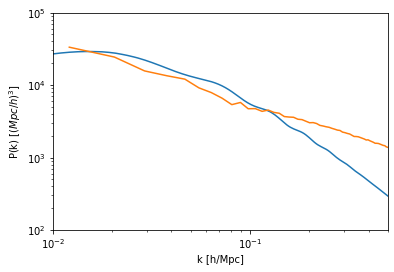

<function matplotlib.pyplot.close(fig=None)>

In [78]:
 #read power spectrum; 
kt, Pkt = np.loadtxt('my_Pk.dat', unpack=True)
kt, Pkt = kt.astype(np.float32), Pkt.astype(np.float32)
plt.loglog(kt,Pkt) 

corrk=1e-4 #extrapolation de 4 ordres de magnitude en 4
corrpk=5e10 #multiplication par presque 11 ordres de magnitude le PS
plt.loglog(corrk*k,corrpk*Pk0) 
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"P(k) $[(Mpc/h)^3]$")
plt.xlim([1e-2, 0.5])
plt.ylim([1e2, 1e5])
plt.show()
#plt.savefig("namefig")
plt.close  

In [9]:
#mesure du spectre de puissance
import yt
import numpy as np
import density_field_library as DFL
import Pk_library as PKL
import matplotlib.pyplot as plt
from scipy import interpolate
import MAS_library as MASL

ds = yt.load('output_00063/info_00063.txt', cosmological=False)

grid              = 256    #grid size
pBoxSize           = ds.domain_width.in_units('Mpc/h') #Mpc/h
BoxSize            =pBoxSize[0].value #Mpc/h
#seed              = 1      #value of the initial random seed
Rayleigh_sampling = 1     #whether sampling the Rayleigh distribution for modes amplitudes
threads           = 1      #number of openmp threads
verbose           = True   #whether to print some information
axis=0
MAS='CIC'





# particle positions in 3D
ad=ds.all_data()
pos = ad['particle_position'].astype(np.float32)*BoxSize

# define 3D density fields
delta = np.zeros((grid,grid,grid), dtype=np.float32)


# construct 3D density field
MASL.MA(pos, delta, BoxSize, MAS, verbose=verbose)



delta /= np.mean(delta, dtype=np.float64);  delta -= 1.0


yt : [INFO     ] 2021-03-18 17:56:28,614 Parameters: current_time              = -13.6385284767374
yt : [INFO     ] 2021-03-18 17:56:28,615 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-03-18 17:56:28,616 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-03-18 17:56:28,617 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-03-18 17:56:28,620 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2021-03-18 17:56:28,625 Detected 1 extra gravity fields.
yt : [WARNING  ] 2021-03-18 17:56:34,539 This output has no cooling fields
yt : [WARNING  ] 2021-03-18 17:56:35,057 The DM particle filter already exists. Overriding.
yt : [WARNING  ] 2021-03-18 17:56:35,058 The star particle filter already exists. Overriding.
yt : [WARNING  ] 2021-03-18 17:56:35,059 The cloud particle filter already exists. Overriding.
yt : [WARNING  ] 2021-03-18 17:56:35,060 The dust particle filter already exists. Overriding.
yt : [WARNING  


Using CIC mass assignment scheme
Time taken = 0.741 seconds



In [10]:
Pk = PKL.Pk(delta, BoxSize, axis, MAS, threads, verbose)
k       = Pk.k3D
Pk0     = Pk.Pk[:,0]
np.savetxt("PS63.txt", [k,Pk0])
#k1,Pk1=np.loadtxt("PS188.txt")




Computing power spectrum of the field...
Time to complete loop = 0.72
Time taken = 1.03 seconds


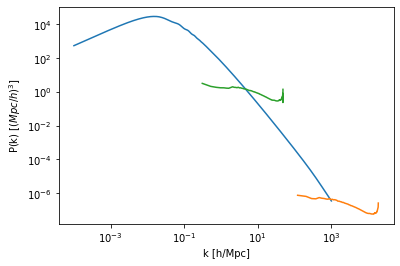

<function matplotlib.pyplot.close(fig=None)>

In [18]:
kt, Pkt = np.loadtxt('my_Pk.dat', unpack=True)
kt, Pkt = kt.astype(np.float32), Pkt.astype(np.float32)
plt.loglog(kt,Pkt)

plt.loglog(k,Pk0/a**2) 

k1,Pk1=np.loadtxt("PS188.txt")
plt.loglog(k1,Pk1) 
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"P(k) $[(Mpc/h)^3]$")
plt.show()
#plt.savefig("namefig")
plt.close  

In [1]:
#mesure du spectre de puissance
import yt
import numpy as np
import density_field_library as DFL
import Pk_library as PKL
import matplotlib.pyplot as plt
from scipy import interpolate
import MAS_library as MASL

ds = yt.load('output_00188/info_00188.txt', cosmological=False)

grid              = 256    #grid size
pBoxSize           = ds.domain_width.in_units('Mpc/h') #Mpc/h
BoxSize            =pBoxSize[0].value #Mpc/h
#seed              = 1      #value of the initial random seed
Rayleigh_sampling = 1     #whether sampling the Rayleigh distribution for modes amplitudes
threads           = 1      #number of openmp threads
verbose           = True   #whether to print some information
axis=0
MAS='CIC'





# particle positions in 3D
ad=ds.all_data()
pos = ad['particle_position'].astype(np.float32)*BoxSize

# define 3D density fields
delta = np.zeros((grid,grid,grid), dtype=np.float32)


# construct 3D density field
MASL.MA(pos, delta, BoxSize, MAS, verbose=verbose)



delta /= np.mean(delta, dtype=np.float64);  delta -= 1.0

yt : [INFO     ] 2021-03-18 17:43:30,614 Changing family DM from 1 to 0
yt : [INFO     ] 2021-03-18 17:43:31,424 Parameters: current_time              = -0.773299053543175
yt : [INFO     ] 2021-03-18 17:43:31,424 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-03-18 17:43:31,425 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-03-18 17:43:31,426 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-03-18 17:43:31,428 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2021-03-18 17:43:31,439 Detected 1 extra gravity fields.
yt : [WARNING  ] 2021-03-18 17:43:38,175 This output has no cooling fields
yt : [INFO     ] 2021-03-18 17:43:38,561 Adding particle_type: DM
yt : [INFO     ] 2021-03-18 17:43:38,577 Adding particle_type: star
yt : [INFO     ] 2021-03-18 17:43:38,595 Adding particle_type: cloud
yt : [INFO     ] 2021-03-18 17:43:38,618 Adding particle_type: dust
yt : [INFO     ] 2021-03-18 17:43:38,652 Addin


Using CIC mass assignment scheme
Time taken = 0.857 seconds




Computing power spectrum of the field...
Time to complete loop = 0.71
Time taken = 1.49 seconds


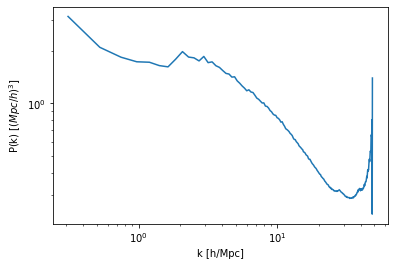

<function matplotlib.pyplot.close(fig=None)>

In [8]:
Pk1 = PKL.Pk(delta, BoxSize, axis, MAS, threads, verbose)
k1       = Pk1.k3D
Pk1     = Pk1.Pk[:,0]
np.savetxt("PS188.txt", [k1,Pk1])
#k1,Pk1=np.loadtxt("PS188.txt")

plt.loglog(k1,Pk1) 
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"P(k) $[(Mpc/h)^3]$")
plt.show()
#plt.savefig("namefig")
plt.close  

In [5]:
from yt.analysis_modules.halo_analysis.api import HaloCatalog
data_ds = yt.load('output_00063/info_00063.txt')
hc = HaloCatalog(data_ds=data_ds, finder_method='hop')
#hc.add_filter('quantity_value', 'particle_mass', '>', 1E8, 'Msun')
hc.create()

yt : [INFO     ] 2021-03-18 16:02:43,671 Parameters: current_time              = 7.409502033614697
yt : [INFO     ] 2021-03-18 16:02:43,673 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-03-18 16:02:43,676 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-03-18 16:02:43,678 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-03-18 16:02:43,680 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-03-18 16:02:43,681 Parameters: current_redshift          = 20.613851438229325
yt : [INFO     ] 2021-03-18 16:02:43,681 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2021-03-18 16:02:43,683 Parameters: omega_matter              = 0.150000005960464
yt : [INFO     ] 2021-03-18 16:02:43,684 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-03-18 16:02:43,685 Parameters: hubble_constant           = 0.63
yt : [WARNING  ] 2021-03-18 16:02:43,710 Detected 1 extra gravity fields.
yt : [WARN

In [26]:
import yt
from yt.analysis_modules.halo_mass_function.api import *
import matplotlib.pyplot as plt
hc_reloaded=yt.load("halo_catalogs/catalog/catalog.0.h5")

/home/stahl/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: The halo_mass_function module does not function correctly and has been deprecated. This code has been moved to the yt attic (https://github.com/yt-project/yt_attic) and will be removed in a future release.
  
yt : [INFO     ] 2021-03-18 18:08:46,113 Parameters: current_time              = 7768455742308156.0 s
yt : [INFO     ] 2021-03-18 18:08:46,114 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-03-18 18:08:46,115 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-03-18 18:08:46,116 Parameters: domain_right_edge         = [2.26609359e+23 2.26609359e+23 2.26609359e+23] code_length
yt : [INFO     ] 2021-03-18 18:08:46,117 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-03-18 18:08:46,119 Parameters: current_redshift          = 20.613851438229325
yt : [INFO     ] 2021-03-18 18:08:46,119 Parameters: omega_lambda         

In [27]:
hmf = HaloMassFcn(halos_ds=hc_reloaded)

yt : [INFO     ] 2021-03-18 18:08:48,821 Allocating for 1.009e+04 particles (index particle type 'all')
yt : [INFO     ] 2021-03-18 18:08:48,834 Identified 3.057e+03 octs


In [28]:
curz=hc_reloaded.current_redshift
hmfLCDM = HaloMassFcn(omega_baryon0=0.0, omega_matter0=0.1,
                      omega_lambda0=0.0, hubble0=0.63, this_redshift=curz,
                      log_mass_min=5, log_mass_max=9)
#hmfSimdata = HaloMassFcn(omega_baryon0=0.0, omega_matter0=0.2,
#                      omega_lambda0=0, hubble0=0.63, this_redshift=0.0,
#                      log_mass_min=2.5, log_mass_max=5.5)

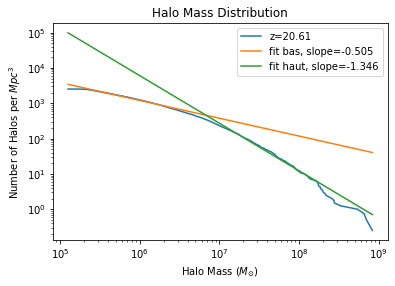

In [98]:
plt.loglog(hmf.masses_sim, hmf.n_cumulative_sim,label='z='+repr(round(curz,2)))
plt.loglog(hmf.masses_sim, 10**params0[1]*hmf.masses_sim**(params0[0]),label='fit bas, slope='+repr(round(params0[0],3)))
#plt.loglog(hmf.masses_sim, 10**params1[1]*hmf.masses_sim**(params1[0]),label='fit moyen, slope='+repr(round(params1[0],3)))
plt.loglog(hmf.masses_sim, 10**params2[1]*hmf.masses_sim**(params2[0]),label='fit haut, slope='+repr(round(params2[0],3)))
#plt.loglog(hmfLCDM.masses_analytic, hmfLCDM.n_cumulative_analytic,label='Analytic')
#plt.loglog(hmfSimdata.masses_analytic, hmfSimdata.n_cumulative_analytic)
plt.title("Halo Mass Distribution")
plt.xlabel("Halo Mass ($M_{\odot}$)")
plt.ylabel("Number of Halos per $Mpc^3$")
plt.legend()
#plt.loglog(hmf.masses_analytic, hmf.n_cumulative_analytic)
#plt.savefig("mass_function.pdf")
plt.show()
plt.close()

In [89]:
cutbas=2500
cutmid=4500
tot=len(hmf.masses_sim)
def test_func(x, a, b):
    return b+ x*a

params0, params0_covariance = optimize.curve_fit(test_func,np.log10(hmf.masses_sim)[0:cutbas], np.log10(hmf.n_cumulative_sim)[0:cutbas],
                                               p0=[1,1])

params1, params1_covariance = optimize.curve_fit(test_func,np.log10(hmf.masses_sim)[cutbas:cutmid], np.log10(hmf.n_cumulative_sim)[cutbas:cutmid],
                                               p0=[1,1])

params2, params2_covariance = optimize.curve_fit(test_func,np.log10(hmf.masses_sim)[cutmid:tot], np.log10(hmf.n_cumulative_sim)[cutmid:tot],
                                               p0=[1,1])


print(params)


[-1.05872076  9.77900015]


In [74]:
hmf.masses_sim


YTArray([1.26148794e+05, 1.41917393e+05, 1.49801693e+05, ...,
         6.57085416e+08, 7.05932595e+08, 8.37616167e+08]) Msun

In [24]:
hc_reloaded.domain_width

In [147]:
hpos[net]/2.26609359386158e+23/20.613851438229325

YTArray([0.24184404, 0.19697395, 0.19475335]) code_length

In [38]:
net=3346
print(net,hmass[net].in_units('1e8*Msun'),hpos[net].in_units('kpc'),hvirad[net].in_units('kpc'))

3346 8.376161671035002 100000000*Msun [366.11862538 298.19147537 294.82979927] kpc 11.669320189207328 kpc


YTArray([0.99703602, 0.03941191, 0.00774133]) code_length

In [30]:
len(hmass)

6637

In [15]:
preecnt=(hpos[0]/(1+hc_reloaded.current_redshift)/+hc_reloaded.domain_width).value
print(preecnt)

[0.0174507  0.08062326 0.01982439]


In [25]:


adc=hc_reloaded.all_data()
hpos = adc['all', 'particle_position']
hmass = adc['all', 'particle_mass']
hvirad=adc['all', 'virial_radius']
maxou=0
net=0
for n in range(0,len(hmass)):
        if(maxou<hmass[n].value):
            net=n
            maxou=hmass[n].value
print(net,hmass[net].in_units('1e8*Msun'),hpos[net],hvirad[net].in_units('kpc'))

949 8.376161671035002 100000000*Msun [1.12972403e+24 9.20122750e+23 9.09749702e+23] code_length 11.669320189207328 kpc


In [25]:
hpos/ds.domain_width.in_units('cm').value

YTArray([[0.93526354, 0.73736289, 0.68543877],
         [0.19232806, 0.93540832, 0.21313711],
         [0.92059507, 0.36057735, 0.87646373],
         ...,
         [1.90014758, 1.46038312, 2.26910971],
         [0.84430255, 0.18953016, 1.15468117],
         [2.54860056, 2.04980249, 2.04506382]]) code_length

In [28]:
import numpy as np

In [120]:
#center=ds.arr([0.9437,0.7841,0.6730], "code_length") #for output33
#center=ds.arr([0.5714,0.4621,0.4252], "code_length") #for output63
#center=ds.arr([0.6155,0.4154,0.4736], "code_length") #for output65
#center=ds.arr([0.5398,0.5608,0.3854], "code_length") #for output65 second biggest
#center=ds.arr([0.9415,0.7455,0.7054], "code_length") #for output21
#center=ds.arr([0.9415,0.7806,0.67764], "code_length") #for output38
center=ds.arr([0.6907,  0.01895,  0.7704], "code_length") #for output pure DM
print(center.value)


[0.6907  0.01895 0.7704 ]


In [163]:
halosize=50
sp = ds.sphere(center.value, (halosize, "kpc"))
particle_mass = sp.quantities.total_quantity("particle_mass")
print(particle_mass.in_units('1e8*Msun'))

199.43971119999972 100000000*Msun


In [164]:
bulk=sp.quantities.bulk_velocity(use_gas=False, use_particles=True, particle_type='matter')
print(bulk.in_units('km/s'))

[-4.9533498   4.16105045  0.61311688] km/s


In [165]:
from numpy import linalg as LA
pos=LA.norm(sp["matter","particle_position"]-center,axis=1)
vel=LA.norm(sp["matter","particle_velocity"]-bulk,axis=1)

In [72]:
np.amax(LA.norm(sp["matter","particle_velocity"]-bulk,axis=1))*1e-5

100.07843390913321

In [ ]:
nbin=75
posbin=np.zeros(nbin)
velbin=np.zeros(nbin)
#velnewtobin=np.zeros(nbin)
#binning
for h in range(0,nbin):
    count=0
    for i in range(0, len(vel)):
        if(maxpos*h/nbin<pos[i]<maxpos*(h+1)/nbin): #bin nb i
            count=count+1
            posbin[h]=pos[i]+posbin[h]
            velbin[h]=vel[i]+velbin[h]
    if(count>0):
        posbin[h]=posbin[h]/count
        velbin[h]=velbin[h]/count
    else:
        posbin[h]=posbin[h-1]
        velbin[h]=velbin[h-1]
    #spherebin = ds.sphere(center.value, (posbin[h]*boxsize, "kpc"))
    #mass_encl = spherebin.quantities.total_quantity("particle_mass")
    #velnewtobin[h]=g*mass_encl/posbin[h]


In [ ]:
g=2.16*1e-39 #in km^2/s^2 kpc/gram
velnewtobin=np.zeros(nbin)
rho=np.zeros(nbin)
#binning
for h in range(0,nbin):
    spherebin = ds.sphere(center.value, (posbin[h]*boxsize, "kpc"))
    mass_encl = spherebin.quantities.total_quantity("particle_mass")
    velnewtobin[h]=np.sqrt(g*mass_encl/(posbin[h]*boxsize))
    rho[h]=5.03e-34*mass_encl/(4*np.pi*posbin[h]*posbin[h]*posbin[h]*boxsize*boxsize*boxsize/3) #g to solar mass

In [151]:
np.savetxt('data_r.txt',posbin*boxsize, delimiter=',')
np.savetxt('data_rho.txt',rho, delimiter=',')

In [ ]:
import matplotlib.pyplot as plt
plt.plot(posbin*boxsize,velbin*1e-5,label='v_particles)') #enter boxlength here
plt.plot(posbin*boxsize,velnewtobin,label='sqrt(GM(r)/r)')
#plt.plot(posbin*boxsize,np.sqrt(particle_mass.value*g/(posbin*boxsize)),label='sqrt(GM_tot/r)') 
plt.title("Velocity profile")
plt.xlabel("radius [kpc]")
plt.ylabel("Circular velocity [km/s]")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(posbin*boxsize,rho,label='rho_measured') #enter boxlength here
#NFW profile
r0=5.52e6
rs=11.82
plt.plot(posbin*boxsize, r0/((posbin*boxsize)/rs*((1+(posbin*boxsize)/rs)**2)),label='best fit NFW')
plt.title("Density profile")
plt.xlim(0,20)
plt.xlabel("radius [kpc]")
plt.ylabel("Density [Msol/kpc^3]")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(posbin*boxsize,velbin*1e-5) #enter boxlength here
plt.title("Velocity profile")
plt.xlabel("radius [kpc]")
plt.ylabel("circular velocity [km/s]")
plt.show()

In [87]:
sp["all","particle_position"]-center
sp["all","particle_velocity"]-bulk

YTArray([[-1760692.62674141,   460290.72618225,  1043222.99515046],
         [ 1939523.84475936,   316456.73555939,    96137.66133454],
         [ 2283912.62095585,   347609.91753207,  1776059.42047393],
         ...,
         [-1582436.40145537,   -52384.52430398,   272765.42476114],
         [ 3719656.76939704,  1016985.06463322,  2442881.12390494],
         [-4956126.4288285 ,  1786422.107022  ,  1642847.97326278]]) cm/s

In [ ]:
center=ds.arr([0.24184404, 0.19697395, 0.19475335], "code_length")

In [63]:
ds = yt.load('r3_gros runs/output_00063/info_00063.txt')
ds.add_particle_filter('matter')
ds.add_particle_filter('antimatter')
ds.add_particle_filter('total')


yt : [INFO     ] 2020-04-30 13:37:04,544 Parameters: current_time              = 7.409502033614697
yt : [INFO     ] 2020-04-30 13:37:04,545 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2020-04-30 13:37:04,546 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-04-30 13:37:04,546 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-04-30 13:37:04,547 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-04-30 13:37:04,548 Parameters: current_redshift          = 20.613851438229325
yt : [INFO     ] 2020-04-30 13:37:04,549 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2020-04-30 13:37:04,549 Parameters: omega_matter              = 0.150000005960464
yt : [INFO     ] 2020-04-30 13:37:04,558 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-04-30 13:37:04,561 Parameters: hubble_constant           = 0.63
yt : [WARNING  ] 2020-04-30 13:37:04,565 Detected 1 extra gravity fields.
yt : [WARN

True

In [60]:
sp = ds.sphere([0.02990634, 0.21646308, 0.02163627], (10, "kpc"))


yt : [WARNING  ] 2020-04-30 13:36:05,557 Detected 1 extra gravity fields.
yt : [WARNING  ] 2020-04-30 13:36:11,531 This output has no cooling fields
yt : [WARNING  ] 2020-04-30 13:36:13,113 The DM particle filter already exists. Overriding.
yt : [WARNING  ] 2020-04-30 13:36:13,114 The star particle filter already exists. Overriding.
yt : [WARNING  ] 2020-04-30 13:36:13,115 The cloud particle filter already exists. Overriding.
yt : [WARNING  ] 2020-04-30 13:36:13,115 The dust particle filter already exists. Overriding.
yt : [WARNING  ] 2020-04-30 13:36:13,116 The star_tracer particle filter already exists. Overriding.
yt : [WARNING  ] 2020-04-30 13:36:13,119 The cloud_tracer particle filter already exists. Overriding.
yt : [WARNING  ] 2020-04-30 13:36:13,122 The dust_tracer particle filter already exists. Overriding.
yt : [WARNING  ] 2020-04-30 13:36:13,123 The gas_tracer particle filter already exists. Overriding.
yt : [INFO     ] 2020-04-30 13:36:13,125 Adding particle_type: DM
yt : [

In [26]:
print(dir(ds.fields.all))

['mesh_id', 'particle_angular_momentum', 'particle_angular_momentum_magnitude', 'particle_angular_momentum_x', 'particle_angular_momentum_y', 'particle_angular_momentum_z', 'particle_cylindrical_velocity_theta', 'particle_cylindrical_velocity_z', 'particle_family', 'particle_identity', 'particle_index', 'particle_level', 'particle_mass', 'particle_ones', 'particle_position', 'particle_position_cylindrical_radius', 'particle_position_cylindrical_theta', 'particle_position_cylindrical_z', 'particle_position_relative', 'particle_position_relative_x', 'particle_position_relative_y', 'particle_position_relative_z', 'particle_position_spherical_phi', 'particle_position_spherical_radius', 'particle_position_spherical_theta', 'particle_position_x', 'particle_position_y', 'particle_position_z', 'particle_radial_velocity', 'particle_radius', 'particle_specific_angular_momentum', 'particle_specific_angular_momentum_x', 'particle_specific_angular_momentum_y', 'particle_specific_angular_momentum_z'

yt : [INFO     ] 2020-04-30 13:38:00,106 xlim = -0.038177 0.097990
yt : [INFO     ] 2020-04-30 13:38:00,107 ylim = 0.148379 0.284547
yt : [INFO     ] 2020-04-30 13:38:00,109 xlim = -0.038177 0.097990
yt : [INFO     ] 2020-04-30 13:38:00,113 ylim = 0.148379 0.284547
yt : [INFO     ] 2020-04-30 13:38:00,118 Making a fixed resolution buffer of (('deposit', 'total_mass')) 800 by 800



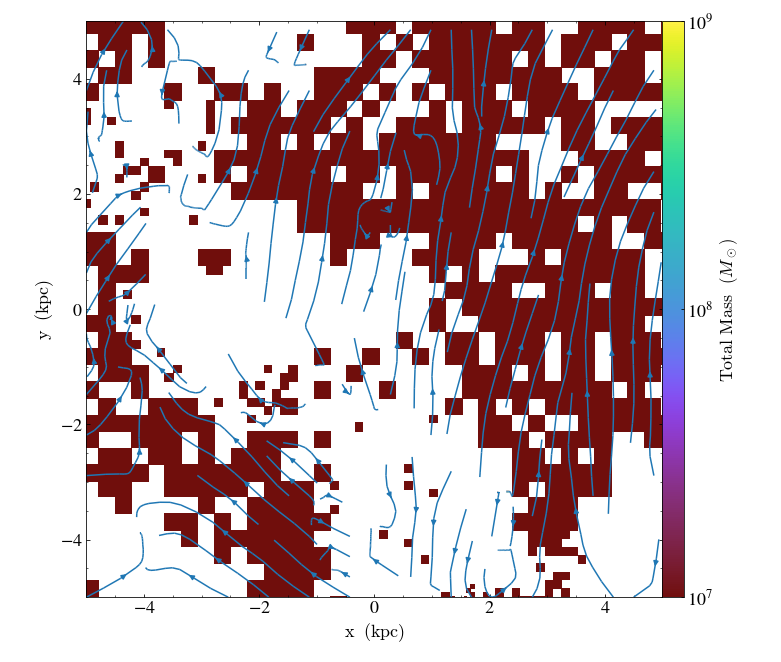

In [71]:
from yt.units import kpc
slcm = yt.SlicePlot(ds, 'z', ('deposit', 'total_mass'), width=(10,'kpc'),center=[0.02990634, 0.21646308, 0.02163627])
slcm.set_unit(('deposit', 'total_mass'), 'Msun')
slcm.set_zlim(('deposit', 'total_mass'), 1e7, 1e9)
slcm.annotate_streamlines(('deposit', 'total_cic_velocity_x'), ('deposit', 'total_cic_velocity_y'))
#slcm.zoom(2)
slcm.show()
#slcm.save()

In [29]:
ad=ds.all_data()
x=ad['particle_position'][:,0]
y=ad['particle_position'][:,1]
z=ad['particle_position'][:,2]
vx=ad['particle_velocity'][:,0]
vy=ad['particle_velocity'][:,1]
vz=ad['particle_velocity'][:,2]
tag=ad['particle_tag'][:].value
mass=ad['particle_mass'][:]




In [38]:
mass.in_units('Msun')/5

YTArray([2.74187217e+08, 2.74187217e+08, 2.74187217e+08, ...,
         2.74187217e+08, 2.74187217e+08, 2.74187217e+08]) Msun

In [37]:
np.std(vx.in_units('km/s'))*5

61.983411155529005 km/s

In [54]:
np.sum(mass.in_units('Msun'))

2.3000490811498456e+16 Msun

In [55]:
np.sum(tag)+np.sum(tag-1)

-1078.0

In [61]:
np.sum(tag*mass).in_units('Msun')

1.1499506471199546e+16 Msun

In [60]:
np.sum((tag-1)*mass).in_units('Msun')

-1.1500984340298608e+16 Msun

In [81]:
((5.1*5*1e-58)/3.276800000000001e-68)/(1e10)

7.781982421874997

In [88]:
(55.3)**3*7.8*1e10/1e16

1.3190765405999998

In [65]:
(5*1.6*5.2*1e-58/(3.2*1e-23)**3)/1e11

1.2695312499999996

In [77]:
3.2*1.6

5.120000000000001

In [59]:
np.sum(tag*mass)/np.sum((tag-1)*mass)

-0.9998715006424378 dimensionless

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
plt.show()



KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pnt3d=ax.scatter(x,y,z,c=tag)
cbar=plt.colorbar(pnt3d)
#cbar.set_label("T")
plt.show()


In [75]:
hc.add_quantity('center_of_mass')
hc.add_quantity('bulk_velocity')
hc.add_callback("sphere", factor=2.0)
hc.create
hc.field_list

AttributeError: 'HaloCatalog' object has no attribute 'field_lists'

In [8]:
adc=hc_reloaded.all_data()
hpos = adc['all', 'particle_position']/hc_reloaded.domain_width
hmass = adc['all', 'particle_mass']*5.02785e-34
with open("distribution2.txt", "w") as dest:
#    dest.write(str(len(hmass))) 
#    dest.write('\n')
    for n in range(len(hmass)):
        dest.write(str(hpos[n][0].value))
        dest.write(' ')
        dest.write(str(hpos[n][1].value))
        dest.write(' ')
        dest.write(str(hpos[n][2].value))
        dest.write(' ')
        dest.write(str(hmass.value[n]))
        dest.write('\n')
dest.close

yt : [INFO     ] 2020-04-27 15:27:02,368 Allocating for 3.990e+03 particles (index particle type 'all')
yt : [INFO     ] 2020-04-27 15:27:02,379 Identified 9.450e+02 octs


<function TextIOWrapper.close()>

In [82]:
plt.loglog(hmf.masses_sim, hmf.n_cumulative_sim)
plt.loglog(hmfLCDM.masses_analytic, hmfLCDM.n_cumulative_analytic)
#plt.loglog(hmfSimdata.masses_analytic, hmfSimdata.n_cumulative_analytic)
plt.title("Halo Mass Distribution")
plt.xlabel("Halo Mass ($M_{\odot}$)")
plt.ylabel("Number of Halos per $Mpc^3$")
#plt.loglog(hmf.masses_analytic, hmf.n_cumulative_analytic)
plt.savefig("mass_function.png")
plt.show()

NameError: name 'hmf' is not defined

In [34]:
cube=ds.covering_grid(max_level, left_edge=low,
                            dims=dims,
                          fields=("all", "particle_position_x"))
a,b,c=cube.shape
print(b)

128


In [12]:
    max_level = ds.index.max_level

    ref = 2**max_level

    low = ds.domain_left_edge
    dims = ds.domain_dimensions*ref

In [283]:
ds.index.max_level

5

In [280]:
# a FFT operates on uniformly gridded data.  We'll use the yt
# covering grid for this.

max_level = ds.index.max_level

ref = 2**max_level

low = ds.domain_left_edge
dims = ds.domain_dimensions*ref

nx, ny, nz = dims


Kk = np.zeros( (nx//2+1, ny//2+1, nz//2+1))

Kk = 0.5*fft_comp(ds, ('deposit', 'matter_density'), max_level, low, dims)

    # wavenumbers
L = (ds.domain_right_edge - ds.domain_left_edge).d

kx = np.fft.rfftfreq(nx)*nx/L[0]
ky = np.fft.rfftfreq(ny)*ny/L[1]
kz = np.fft.rfftfreq(nz)*nz/L[2]

    # physical limits to the wavenumbers
kmin = np.min(1.0/L)
kmax = np.min(0.5*dims/L)

kbins = np.arange(kmin, kmax, kmin)
N = len(kbins)

    # bin the Fourier modes into radial kbins
kx3d, ky3d, kz3d = np.meshgrid(kx, ky, kz, indexing="ij")
k = np.sqrt(kx3d**2 + ky3d**2 + kz3d**2)

whichbin = np.digitize(k.flat, kbins)
ncount = np.bincount(whichbin)

E_spectrum = np.zeros(len(ncount)-1)

for n in range(1,len(ncount)):
    E_spectrum[n-1] = np.sum(Kk.flat[whichbin==n])
        
#print(np.sum(Kk.flat[63]))

#print(Kk[10,11,20],Kk[11,10,20],Kk[20,11,10])
print(k[0,1])

MemoryError: Unable to allocate 8.02 GiB for an array with shape (1025, 1025, 1025) and data type float64

In [310]:
def doit(ds):

    # a FFT operates on uniformly gridded data.  We'll use the yt
    # covering grid for this.

    max_level = ds.index.max_level

    ref = 2**max_level

    low = ds.domain_left_edge
    dims = ds.domain_dimensions*ref

    nx, ny, nz = dims


    Kk = np.zeros( (nx//2+1, ny//2+1, nz//2+1))

    Kk = 0.5*fft_comp(ds, ('deposit', 'matter_density'), max_level, low, dims)

    # wavenumbers
    L = (ds.domain_right_edge - ds.domain_left_edge).d

    kx = np.fft.rfftfreq(nx)*nx/L[0]
    ky = np.fft.rfftfreq(ny)*ny/L[1]
    kz = np.fft.rfftfreq(nz)*nz/L[2]

    # physical limits to the wavenumbers
    kmin = np.min(1.0/L)
    kmax = np.min(0.5*dims/L)

    kbins = np.arange(kmin, kmax, kmin)
    N = len(kbins)

    # bin the Fourier modes into radial kbins
    kx3d, ky3d, kz3d = np.meshgrid(kx, ky, kz, indexing="ij")
    k = np.sqrt(kx3d**2 + ky3d**2 + kz3d**2)

    whichbin = np.digitize(k.flat, kbins)
    ncount = np.bincount(whichbin)

    E_spectrum = np.zeros(len(ncount)-1)

    for n in range(1,len(ncount)):
        E_spectrum[n-1] = np.sum(Kk.flat[whichbin==n])

    scaling_factor = 2*np.pi/(ds.domain_width.in_units("Mpccm/h").value[0])      
        
    k = (0.5*(kbins[0:N-1] + kbins[1:N]))*scaling_factor
    E_spectrum = E_spectrum[1:N]

    index = np.argmax(E_spectrum)
    kmax = k[index]
    Emax = E_spectrum[index]

 
 #   plt.loglog(kx,Kk[1])   
    plt.loglog(k, E_spectrum)

    plt.xlabel(r'k [h/Mpc]')
    plt.ylabel(r"$P(k)dk?$")

 #   plt.savefig("spectrum.png")
    
    
def fft_comp(ds, ipos, level, low, delta):

    cube = ds.covering_grid(level, left_edge=low,
                            dims=delta,
                            fields=[ipos])

    dens = cube[ipos].d-mean_rho.value

    nx, ny, nz = pos.shape

    # do the FFTs -- note that since our data is real, there will be
    # too much information here.  fftn puts the positive freq terms in
    # the first half of the axes -- that's what we keep.  Our
    # normalization has an '8' to account for this clipping to one
    # octant.
    ru = np.fft.fftn(pos)[0:nx//2+1,0:ny//2+1,0:nz//2+1]
    ru = 8.0*ru/(nx*ny*nz)/mean_rho.value

    return np.abs(ru)**2





In [218]:
sp = ds.sphere([0.5,0.5,0.5], (1000, "Mpccm"))


min_rho = sp.min(('deposit', 'matter_density'))
max_rho = sp.max(('deposit', 'matter_density'))

mean_rho = sp.mean(('deposit', 'matter_density'))
print(mean_rho.value)

3.4016379684092383e-25


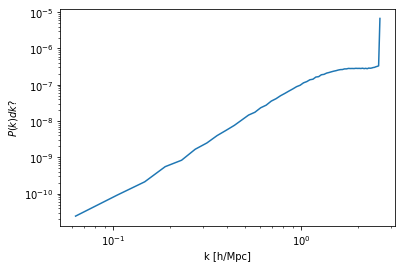

In [311]:
doit(ds)

In [132]:



cube=ds.covering_grid(max_level, left_edge=low,
                            dims=ds.domain_dimensions,
                          fields=[('deposit', 'total_density')])

pos = cube[('deposit', 'total_density')].d

print(pos.shape)



(128, 128, 128)


In [117]:
ad[("all", "particle_position")].shape

(2097152, 3)

In [125]:
ad[('deposit', 'total_density')].shape

(2097152,)

In [92]:
pos=cube[("all", "particle_position")].d
pos.shape

(2097152, 3)

In [93]:
pos=cube[("all", "particle_position")].d
ru = np.fft.fftn(pos)[0:nx//2+1,0:ny//2+1,0:nz//2+1]

IndexError: too many indices for array

In [107]:
test=np.zeros( (nx//2+1, ny//2+1, nz//2+1))
test.shape

(65, 65, 65)

In [101]:
nres=np.fft.fftn(test)[0:nx//2+1,0:ny//2+1,0:nz//2+1]
nres.shape

(65, 65, 65)

In [75]:
    max_level = ds.index.max_level



    low = ds.domain_left_edge
    dims = ds.domain_width

    nx, ny, nz = [256,256,256]


   # Kk = np.zeros( (nx//2+1, ny//2+1, nz//2+1))
    
print(nx)


256


In [28]:
ds.field_list


[('all', 'particle_family'),
 ('all', 'particle_identity'),
 ('all', 'particle_level'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_tag'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('gravity', 'potential'),
 ('gravity', 'var0'),
 ('gravity', 'x-acceleration'),
 ('gravity', 'y-acceleration'),
 ('gravity', 'z-acceleration'),
 ('io', 'particle_family'),
 ('io', 'particle_identity'),
 ('io', 'particle_level'),
 ('io', 'particle_mass'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_tag'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z')]

In [ ]:
def doit(ds):

    # a FFT operates on uniformly gridded data.  We'll use the yt
    # covering grid for this.

    max_level = ds.index.max_level

    ref = 2**max_level

    low = ds.domain_left_edge
    dims = ds.domain_dimensions*ref

    nx, ny, nz = dims


    Kk = np.zeros( (nx//2+1, ny//2+1, nz//2+1))

    Kk = 0.5*fft_comp(ds, ('deposit', 'matter_density'), max_level, low, dims)

    # wavenumbers
    L = (ds.domain_right_edge - ds.domain_left_edge).d

    kx = np.fft.rfftfreq(nx)*nx/L[0]
    ky = np.fft.rfftfreq(ny)*ny/L[1]
    kz = np.fft.rfftfreq(nz)*nz/L[2]

    # physical limits to the wavenumbers
    kmin = np.min(1.0/L)
    kmax = np.min(0.5*dims/L)

    kbins = np.arange(kmin, kmax, kmin)
    N = len(kbins)

    # bin the Fourier modes into radial kbins
    kx3d, ky3d, kz3d = np.meshgrid(kx, ky, kz, indexing="ij")
    k = np.sqrt(kx3d**2 + ky3d**2 + kz3d**2)

    whichbin = np.digitize(k.flat, kbins)
    ncount = np.bincount(whichbin)

    E_spectrum = np.zeros(len(ncount)-1)

    for n in range(1,len(ncount)):
        E_spectrum[n-1] = np.sum(Kk.flat[whichbin==n])

    scaling_factor = 2*np.pi/(ds.domain_width.in_units("Mpccm/h").value[0])      
        
    k = (0.5*(kbins[0:N-1] + kbins[1:N]))*scaling_factor
    E_spectrum = E_spectrum[1:N]

    index = np.argmax(E_spectrum)
    kmax = k[index]
    Emax = E_spectrum[index]

 
    
    plt.loglog(k, E_spectrum)

    plt.xlabel(r'k [h/Mpc]')
    plt.ylabel(r"$P(k)dk?$")

    plt.savefig("spectrum.png")
    
    
def fft_comp(ds, ipos, level, low, delta):

    cube = ds.covering_grid(level, left_edge=low,
                            dims=delta,
                            fields=[ipos])

    dens = cube[ipos].d

    nx, ny, nz = pos.shape

    # do the FFTs -- note that since our data is real, there will be
    # too much information here.  fftn puts the positive freq terms in
    # the first half of the axes -- that's what we keep.  Our
    # normalization has an '8' to account for this clipping to one
    # octant.
    ru = np.fft.fftn(pos)[0:nx//2+1,0:ny//2+1,0:nz//2+1]
    ru = 8.0*ru/(nx*ny*nz)/mean_rho.value

    return np.abs(ru)**2


In [35]:
from yt.mods import *
from yt.utilities.amr_kdtree import *
from yt.analysis_modules.two_point_functions.api import *

# Specify the dataset on which we want to base our work.
ds = load('gros runs/output_00021/info_00021.txt')

# We work in simulation's units, these are for conversion.
vol_conv = ds['cm'] ** 3
#sm = ds.index.get_smallest_dx()**3

# Our density limit, in gm/cm**3
dens = 2e-31

# We need to find out how many cells (equivalent to the most refined level)
# are denser than our limit overall.
def _NumDens(data):
    select = data["density"] >= dens
    cv = data["cell_volume"][select] / vol_conv / sm
    return (cv.sum(),)
def _combNumDens(data, d):
    return d.sum()
add_quantity("TotalNumDens", function=_NumDens,
    combine_function=_combNumDens, n_ret=1)
all = ds.all_data()
n = all.quantities["TotalNumDens"]()

print(n,'n')

# Instantiate our TPF object.
tpf = TwoPointFunctions(ds, ['density', 'cell_volume'],
    total_values=1e5, comm_size=10000,
    length_number=11, length_range=[-1, .5],
    length_type="lin", vol_ratio=1)

# Define the density threshold two point correlation function.
def dens_tpcorr(a, b, r1, r2, vec):
    # We want to find out which pairs of Densities from a and b are both
    # dense enough. The first column is density.
    abig = (a[:,0] >= dens)
    bbig = (b[:,0] >= dens)
    both = np.bitwise_and(abig, bbig)
    # We normalize by the volume of the most refined cells.
    both = both.astype('float')
    both *= a[:,1] * b[:,1] / vol_conv**2 / sm**2
    return both

# Now we add the function to the TPF.
# ``corr_norm`` is used to normalize the correlation function.
tpf.add_function(function=dens_tpcorr, out_labels=['tpcorr'], sqrt=[False],
    corr_norm=n**2 * sm**2)

# And define how we want to bin things.
# It has to be linear bin_type because we want 0 to be in the range.
# The top end of bin_range should be 2^(2l)+1, where l is the number of
# levels, and bin_number=2^(2l)+2
tpf[0].set_pdf_params(bin_type='lin', bin_range=[0, 2], bin_number=3)

# Runs the functions.
tpf.run_generator()

# Write out the data to "dens_tpcorr_correlation.txt"
# The file has two columns, the first is radius, and the second is
# the value of \xi.
tpf.write_out_correlation()

yt : [INFO     ] 2020-04-06 16:17:15,651 Parameters: current_time              = 13.548294773945502
yt : [INFO     ] 2020-04-06 16:17:15,652 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2020-04-06 16:17:15,653 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-04-06 16:17:15,653 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-04-06 16:17:15,654 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-04-06 16:17:15,655 Parameters: current_redshift          = 66.77949630608964
yt : [INFO     ] 2020-04-06 16:17:15,655 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2020-04-06 16:17:15,656 Parameters: omega_matter              = 0.150000005960464
yt : [INFO     ] 2020-04-06 16:17:15,656 Parameters: hubble_constant           = 0.63


NameError: name 'add_quantity' is not defined

In [151]:
np.fft.fftn(mdens)

MemoryError: 

In [7]:
from yt.mods import *
from yt.utilities.kdtree import *
from yt.analysis_modules.two_point_functions.api import *




# We work in simulation's units, these are for conversion.
vol_conv = ds['cm'] ** 3
sm = ds.index.get_smallest_dx()**3

# Our density limit, in gm/cm**3
dens = 2e-28

# We need to find out how many cells (equivalent to the most refined level)
# are denser than our limit overall.
def _NumDens(data):
    select = data['deposit', 'matter_density'] >= dens
    cv = data["cell_volume"][select] / vol_conv / sm
    return (cv.sum(),)
def _combNumDens(data, d):
    return d.sum()
add_quantity("TotalNumDens", function=_NumDens,
    combine_function=_combNumDens, n_ret=1)
all = ds.all_data()
n = all.quantities["TotalNumDens"]()

print(n,'n')

# Instantiate our TPF object.
tpf = TwoPointFunctions(ds, ['deposit', 'matter_density', 'cell_volume'],
    total_values=1e5, comm_size=10000,
    length_number=11, length_range=[-1, .5],
    length_type="lin", vol_ratio=1)

# Define the density threshold two point correlation function.
def dens_tpcorr(a, b, r1, r2, vec):
    # We want to find out which pairs of Densities from a and b are both
    # dense enough. The first column is density.
    abig = (a[:,0] >= dens)
    bbig = (b[:,0] >= dens)
    both = np.bitwise_and(abig, bbig)
    # We normalize by the volume of the most refined cells.
    both = both.astype('float')
    both *= a[:,1] * b[:,1] / vol_conv**2 / sm**2
    return both

# Now we add the function to the TPF.
# ``corr_norm`` is used to normalize the correlation function.
tpf.add_function(function=dens_tpcorr, out_labels=['tpcorr'], sqrt=[False],
    corr_norm=n**2 * sm**2)

# And define how we want to bin things.
# It has to be linear bin_type because we want 0 to be in the range.
# The top end of bin_range should be 2^(2l)+1, where l is the number of
# levels, and bin_number=2^(2l)+2
tpf[0].set_pdf_params(bin_type='lin', bin_range=[0, 2], bin_number=3)

# Runs the functions.
tpf.run_generator()

# Write out the data to "dens_tpcorr_correlation.txt"
# The file has two columns, the first is radius, and the second is
# the value of \xi.
tpf.write_out_correlation()

ModuleNotFoundError: No module named 'yt.utilities.kdtree'

In [16]:
pmass = ad['all', 'particle_mass']
pmass.in_units('Msun')

YTArray([7095.86985194, 7095.86985194, 7095.86985194, ..., 7095.86985194,
         7095.86985194, 7095.86985194]) Msun

In [12]:
ad = ds.all_data()
ptag = ad['all', 'particle_tag']
for n in range(20):
        print(n,ptag[n])

0 1.0 dimensionless
1 1.0 dimensionless
2 1.0 dimensionless
3 0.0 dimensionless
4 1.0 dimensionless
5 1.0 dimensionless
6 1.0 dimensionless
7 1.0 dimensionless
8 0.0 dimensionless
9 1.0 dimensionless
10 1.0 dimensionless
11 1.0 dimensionless
12 0.0 dimensionless
13 1.0 dimensionless
14 1.0 dimensionless
15 1.0 dimensionless
16 1.0 dimensionless
17 1.0 dimensionless
18 1.0 dimensionless
19 0.0 dimensionless


In [104]:
ad = ds.all_data()
ptag = ad['all', 'particle_tag']
pvelx = ad['all', 'particle_velocity_x']
pvely = ad['all', 'particle_velocity_y']
pvelz = ad['all', 'particle_velocity_z']
for n in range(10):
        if(pvelx[n]>1e1):
            print(n,ptag[n],'+vx=',pvelx[n])
        if(pvelx[n]<-1e1):
            print(n,ptag[n],pvelx[n])
        if(pvely[n]>1e1):
            print(n,ptag[n],pvely[n])
        if(pvely[n]<-1e1):
            print(n,ptag[n],pvely[n])
        if(pvelz[n]>1e1):
            print(n,ptag[n],pvelz[n])
        if(pvelz[n]<-1e1):
            print(n,ptag[n],pvelz[n])

0 0.0 dimensionless +vx= 5352.191856765892 cm/s
0 0.0 dimensionless -37217.07144488707 cm/s
0 0.0 dimensionless -5122.035448163174 cm/s
1 0.0 dimensionless +vx= 37896.350092325265 cm/s
1 0.0 dimensionless 15333.55605129658 cm/s
1 0.0 dimensionless 8735.747032007894 cm/s
2 0.0 dimensionless +vx= 1902.7675635713117 cm/s
2 0.0 dimensionless 6658.926860019011 cm/s
2 0.0 dimensionless -3198.0059047887726 cm/s
3 0.0 dimensionless +vx= 27702.042743649996 cm/s
3 0.0 dimensionless -3839.7075226958464 cm/s
3 0.0 dimensionless 7280.204474578404 cm/s
4 1.0 dimensionless -11072.087132611992 cm/s
4 1.0 dimensionless 35656.410146070644 cm/s
4 1.0 dimensionless -38382.41878466379 cm/s
5 0.0 dimensionless +vx= 43334.558039532014 cm/s
5 0.0 dimensionless 12340.152599869489 cm/s
5 0.0 dimensionless 23618.89529298735 cm/s
6 1.0 dimensionless +vx= 392.00412069207937 cm/s
6 1.0 dimensionless 7435.382880991622 cm/s
6 1.0 dimensionless -3910.277062315028 cm/s
7 0.0 dimensionless +vx= 249.8439205883946 cm/s
7 

In [161]:
ad = ds.all_data()
ptag = ad['all', 'particle_tag']
pvelx = ad['all', 'particle_velocity_x']
pvely = ad['all', 'particle_velocity_y']
pvelz = ad['all', 'particle_velocity_z']
for n in range(len(ptag)):
        if(pvelx[n]>1e8):
            print(n,ptag[n],'+vx=',pvelx[n])
        if(pvelx[n]<-1e8):
            print(n,ptag[n],'-vx=',pvelx[n])
        if(pvely[n]>1e8):
            print(n,ptag[n],'+vy=',pvely[n])
        if(pvely[n]<-1e8):
            print(n,ptag[n],'-vy=',pvely[n])
        if(pvelz[n]>1e8):
            print(n,ptag[n],'+vz=',pvelz[n])
        if(pvelz[n]<-1e8):
            print(n,ptag[n],'-vz=',pvelz[n])

In [ ]:
matter = ad["particle_tag"]==0
antimatter = ad["particle_tag"]==1
print(ad['particle_mass'])
print(ad['particle_mass'][matter])
print(len(ad['particle_mass']))
print(len(ad['particle_mass'][matter]))

In [21]:
pposx = ad['all', 'particle_position_x']
pposy = ad['all', 'particle_position_y']
pposz = ad['all', 'particle_position_z']
pmas = ad['all', 'particle_mass']
ptype = ad['all', 'particle_tag']
with open("distribution.txt", "w") as dest:
    for n in range(len(pmas)):
        dest.write(str(n))
        dest.write(', ')
        dest.write(str(pposx.value[n]))
        dest.write(', ')
        dest.write(str(pposy.value[n]))
        dest.write(', ')
        dest.write(str(pposz.value[n]))
        dest.write(', ')
        dest.write(str(pmas.value[n]))
        dest.write(', ')
        dest.write(str(ptype.value[n]))
        dest.write('\n')
dest.close

KeyboardInterrupt: 

In [19]:
pposx = ad['all', 'particle_position_x']

pposx.value[4]

0.07807480631487676

In [40]:
ad = ds.all_data()
pposx = ad['all', 'particle_position_x']
for n in range(230000,230500):
        print(pposx[n])

0.15228388182767644 code_length
0.6234866029722326 code_length
0.12978045207365935 code_length
0.641149900808534 code_length
0.14806976646111247 code_length
0.6231617323850286 code_length
0.13444235373118485 code_length
0.6453249852112659 code_length
0.3976807774090548 code_length
0.8711972757355502 code_length
0.3875541704233322 code_length
0.8838834076372173 code_length
0.391042547695476 code_length
0.8784093201893616 code_length
0.39087064729082655 code_length
0.8710535992242974 code_length
0.13714376515745966 code_length
0.6254954198815362 code_length
0.1250767863054048 code_length
0.6248733714556368 code_length
0.12909698628088295 code_length
0.6293239843416966 code_length
0.15076249107640505 code_length
0.627870995407422 code_length
0.39668901359939596 code_length
0.8563371051632331 code_length
0.3917530223075348 code_length
0.8758762037000404 code_length
0.38583224064444444 code_length
0.8695640707998565 code_length
0.3818489807187592 code_length
0.8637458787714816 code_length
0

In [16]:

ds.field_list


[('all', 'particle_family'),
 ('all', 'particle_identity'),
 ('all', 'particle_level'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_tag'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('gravity', 'potential'),
 ('gravity', 'x-acceleration'),
 ('gravity', 'y-acceleration'),
 ('gravity', 'z-acceleration'),
 ('io', 'particle_family'),
 ('io', 'particle_identity'),
 ('io', 'particle_level'),
 ('io', 'particle_mass'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_tag'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z')]

In [476]:
print (ds.domain_width.in_units("kpc"))
print (ds.domain_width.in_units("au"))
print (ds.domain_width.in_units("mile"))


[2.63551844 2.63551844 2.63551844] kpc
[5.43614701e+08 5.43614701e+08 5.43614701e+08] au
[5.0532269e+16 5.0532269e+16 5.0532269e+16] mile


In [12]:
ds.particle_types_raw

('io',)

In [475]:
print (ds.particle_types)
print (ds.particle_types_raw)
print (ds.particle_type_counts)


('io', 'all', 'DM', 'star', 'cloud', 'dust', 'star_tracer', 'cloud_tracer', 'dust_tracer', 'gas_tracer', 'matter', 'antimatter', 'total')
('io',)
{'io': 2097152, 'DM': 0, 'star': 0, 'cloud': 0, 'dust': 0, 'star_tracer': 0, 'cloud_tracer': 0, 'dust_tracer': 0, 'gas_tracer': 0, 'matter': 0, 'antimatter': 0, 'total': 0}


In [44]:
ds.field_list

[('all', 'particle_family'),
 ('all', 'particle_identity'),
 ('all', 'particle_level'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_tag'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('gravity', 'potential'),
 ('gravity', 'x-acceleration'),
 ('gravity', 'y-acceleration'),
 ('gravity', 'z-acceleration'),
 ('io', 'particle_family'),
 ('io', 'particle_identity'),
 ('io', 'particle_level'),
 ('io', 'particle_mass'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_tag'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z')]

In [47]:
ad = ds.all_data()
ppos = ad['all', 'particle_position']
pposx = ad['all', 'particle_position_x']
pposy = ad['all', 'particle_position_y']
pposz = ad['all', 'particle_position_z']
pmas = ad['all', 'particle_mass']
ptype = ad['all', 'particle_tag'] # 0 pour la matière et 1 pour l'antimatière


In [51]:
accx=ad['gravity', 'potential']

ValueError: Size obtained (8) does not match with the expected size (4) of record